# Visualize OpenAI Embeddings with Phoenix

## Load ChatGPT

The following is an example of an analysis of data collected from GPT-3.5 (ChatGPT) and GPT response dataset. This example was collected using the OpenAI python API below and can be analyzed in Phoenix. The notebook below:

* Imports a dataset
* Loads the dataset into Phoenix for analysis
* Export a Cluster from Phoenix for further analysis

## Import Data

This dataset includes embeddings for both the prompt and response. The embeddings were generated using OpenAI's `text-embedding-ada-002` embedding model.

In [ ]:
!pip install openai
!pip install ipywidgets

In [4]:
import pandas as pd
import json

In [5]:
conversations_df = pd.read_parquet("https://storage.googleapis.com/arize-assets/sallyann/openai-example/phoenix_embeddings_example.parquet")

In [6]:
conversations_df.head()

,prompt,response,step,conversation_id,prediction_id,api_call_duration,prompt_len,response_len,prompt_category,prompt_ada_embedding,response_ada_embedding
0,Why does the UI have to be so clunky and unint...,I'm sorry to hear that you're experiencing dif...,0,0a9c,0,6.238615,88,73,User Interface,"[0.007536735851317644, -0.020783506333827972, ...","[-0.018356293439865112, -0.021593287587165833,..."
1,I can't seem to find the options I need on thi...,"As an AI language model, I cannot solve produc...",1,0a9c,1,7.339510,83,83,Usability issues,"[-0.011567087844014168, -0.018025599420070648,...","[-0.013666314072906971, -0.024923289194703102,..."
2,"Sorry, as an AI language model, I cannot gener...","As an AI language model, I understand that sof...",2,0a9c,2,5.153821,43,58,Details needed.,"[-0.019600937142968178, -0.027385422959923744,...","[-0.01836424320936203, -0.029452338814735413, ..."
3,I keep getting the same generic response from ...,I'm sorry to hear that. Have you tried reachin...,0,8be8,3,4.994674,36,55,Customer support,"[-0.021265652030706406, -0.012363750487565994,...","[-0.011841220781207085, 0.0007290365174412727,..."
4,I've been trying to get a response from their ...,I understand how frustrating that can be. Have...,0,f682,4,5.371167,26,63,Support Experience,"[-0.022943034768104553, -0.008929352276027203,...","[-0.012475305236876011, -0.012213942594826221,..."


## **Setup Phoenix**


In [ ]:
!pip install arize-phoenix

In [2]:
import phoenix as px

# Define a Schema() object for Phoenix to pick up data from the correct columns for logging
schema = px.Schema(
    feature_column_names=[
        "step",
        "conversation_id",
        "api_call_duration",
        "response_len",
        "prompt_len",
        "prediction_id",
        "prompt_category"
    ],
    prompt_column_names=px.EmbeddingColumnNames(
        vector_column_name="prompt_ada_embedding", raw_data_column_name="prompt"
    ),
    response_column_names=px.EmbeddingColumnNames(
        vector_column_name="response_ada_embedding", raw_data_column_name="response"
    ),
    prediction_label_column_name="prediction",
    actual_label_column_name="target",
)

In [7]:
# Create the dataset from the conversaiton dataframe & schema
conv_ds = px.Dataset(conversations_df, schema, "production")

## Visualize Embeddings in Phoenix
For more imformation on using the Phoenix Application visit https://docs.arize.com/phoenix/concepts/phoenix-basics#application

In [8]:
# Click the link below to open in a view in Phoenix of ChatGPT data
px.launch_app(conv_ds)

🌍 To view the Phoenix app in your browser, visit https://debmrkrsrh91-496ff2e9c6d22116-24265-colab.googleusercontent.com/
📺 To view the Phoenix app in a notebook, run `px.active_session().view()`
📖 For more information on how to use Phoenix, check out https://docs.arize.com/phoenix


The application provide you with a landing page that is populated with your model's schema (e.g. the features, tags, predictions, and actuals). This gives you a statistical overview of your data as well as links into the embeddings details views for analysis. Simply click into one of the embedding features to visualize your embeddings.

Phoenix automatically breaks up your embeddings into groups of inferences using a clustering algorithm called HDBSCAN. This is particularly useful if you are trying to identify areas of your embeddings that are drifting or performing badly.

In addition to the point-cloud, another dimension we have at our disposal is color. Phoenix let's you assign colors to the UMAP point-cloud by dimension (features, tags, predictions, actuals), performance (correctness which distinguishes true positives and true negatives from the incorrect predictions), and dataset (to highlight areas of drift). This helps you explore your point-cloud from different perspectives depending on what you are looking for.

In [ ]:
px.active_session().view()

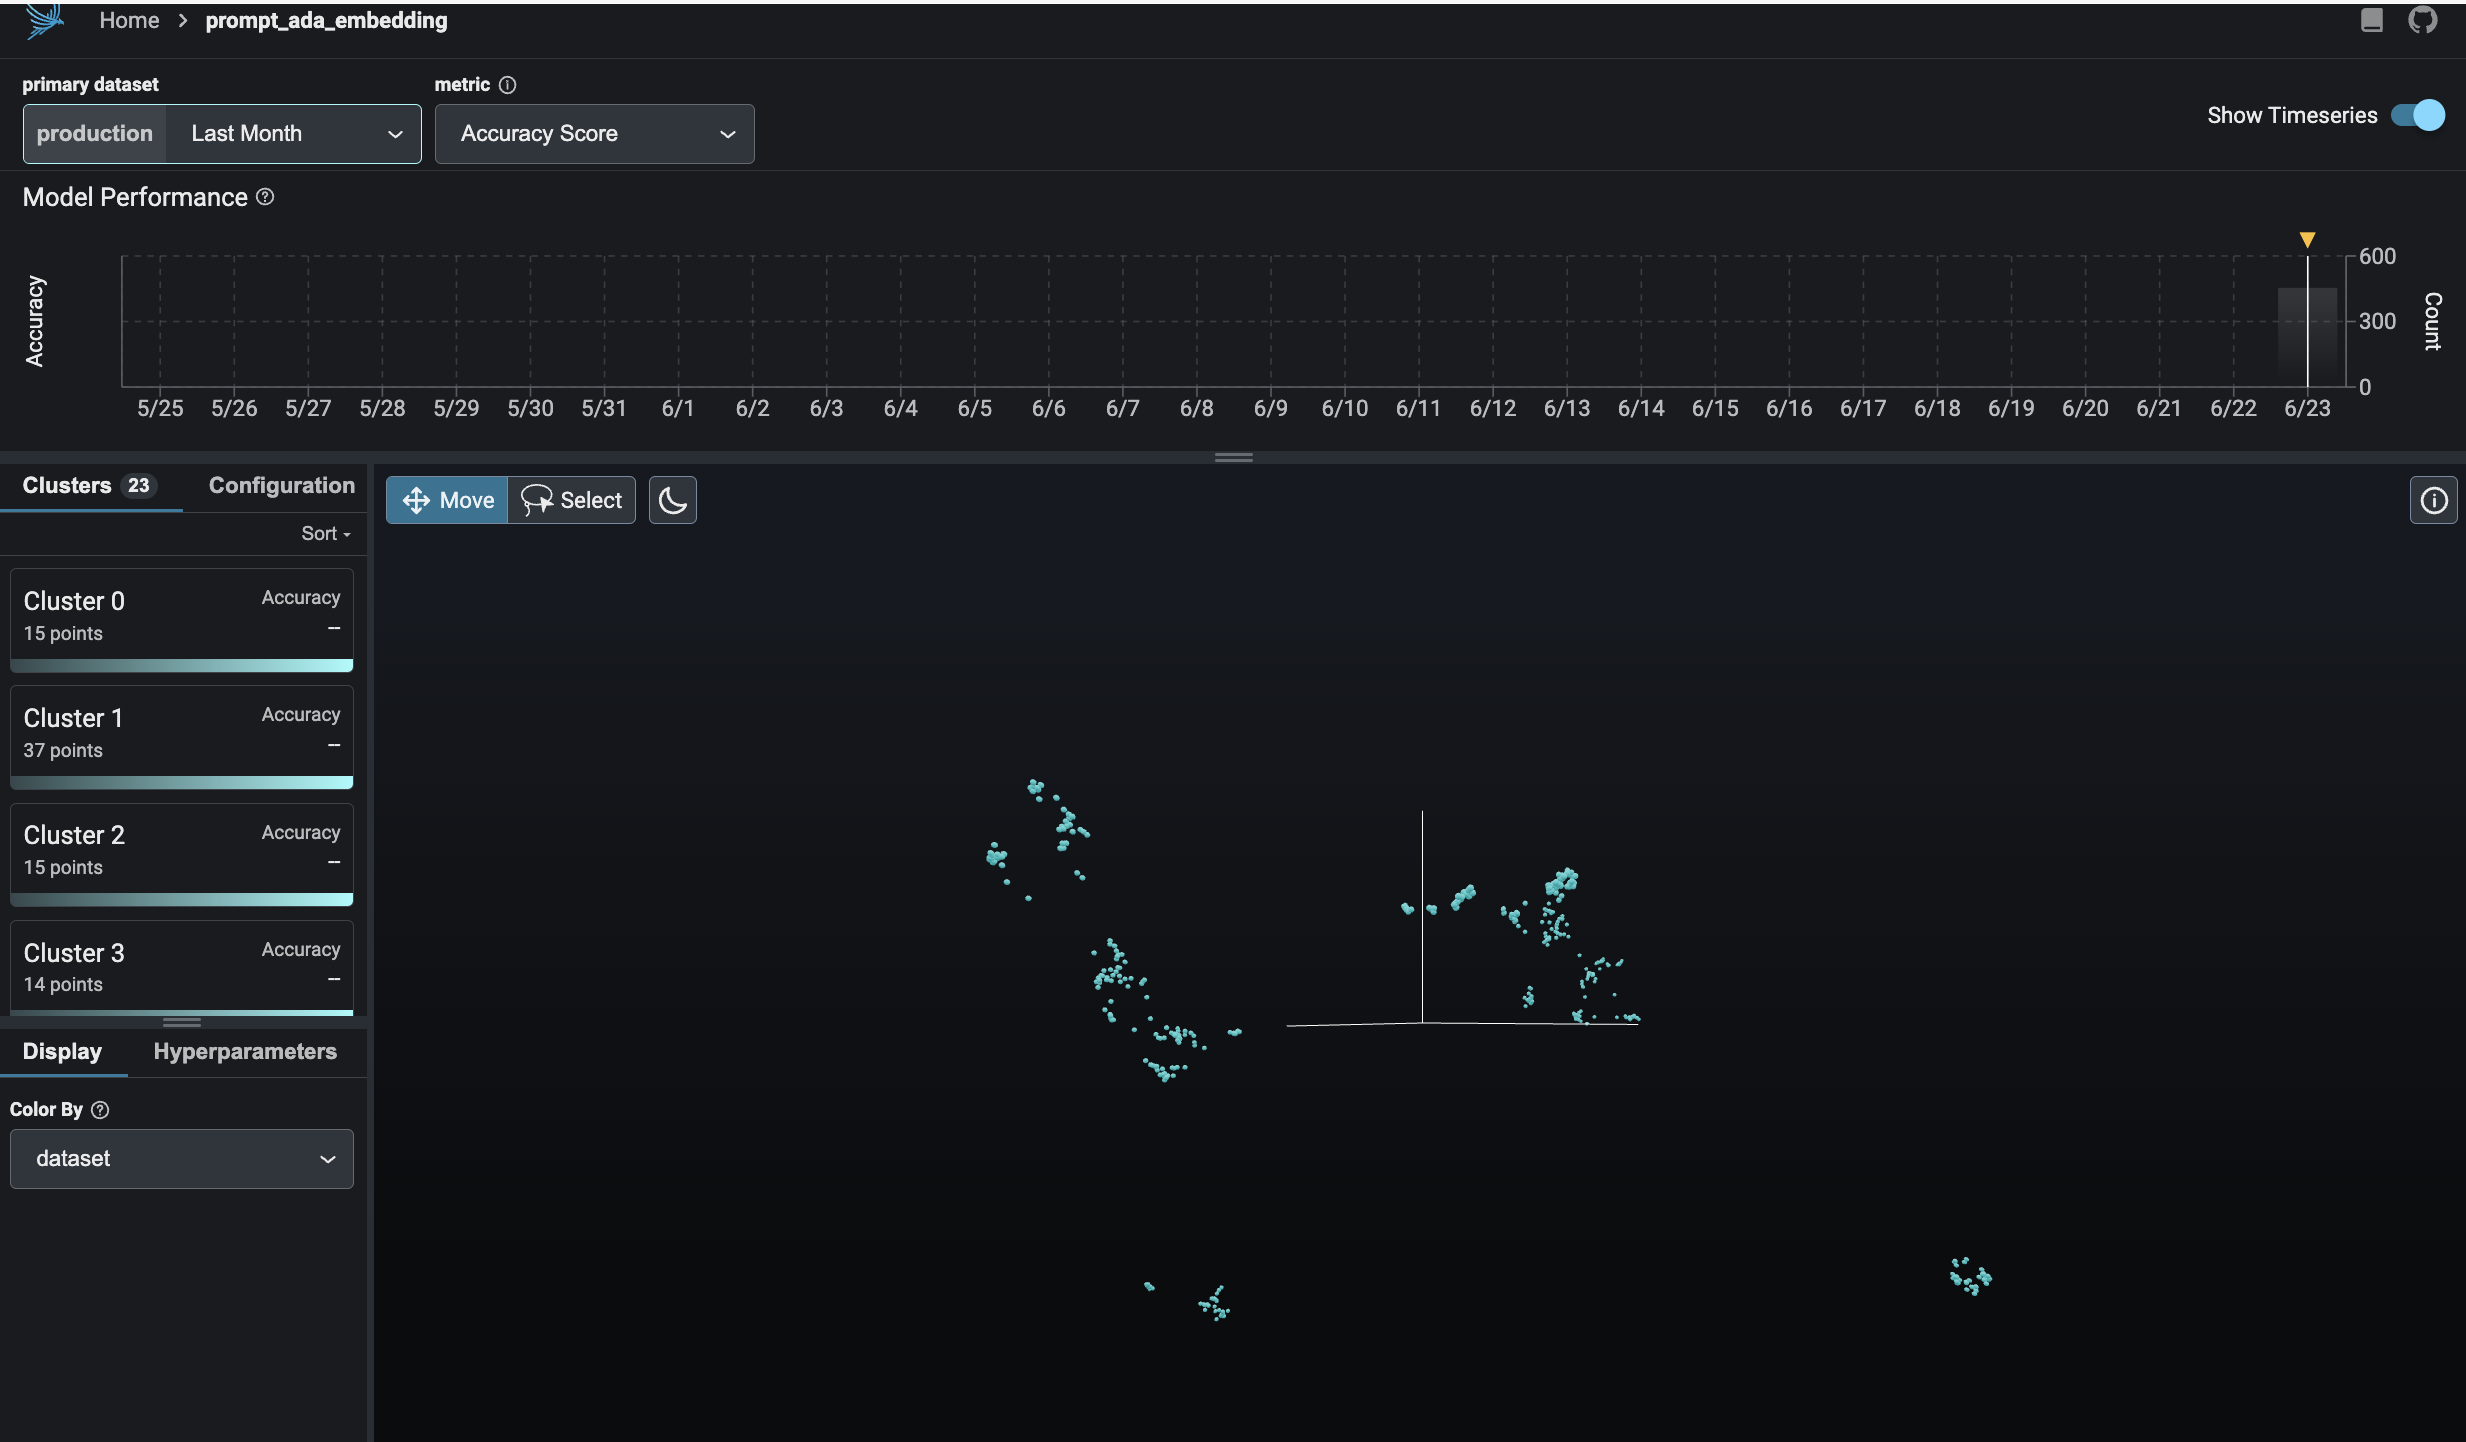

**Download a Cluster!**

All you need to do is click the download a cluster button in Phoenix! That is it. The export works by exporting the cluster back to the notebook below in a dataframe. Run the below after you click the download button in Phoenix.

The example above is just for test purposes and application specific integrations will look different.

Phoenix Repo: https://github.com/Arize-ai/phoenix

Phoenix Docs: https://docs.arize.com/phoenix/
